## Run valve experiment
#### Input valve metadata (at least valve number) and run experiment to add test data to dictionary

In [731]:
import os
import pickle
import numpy as np
import time as time
import matplotlib.pyplot as plt
import seaborn as sns

from Experiment_Utils import Valve_Experiment,  valve_plot_dict_key

In [732]:
# FOR DEBUGGING - feel free to ignore.
%load_ext autoreload
%autoreload 2
from Experiment_Utils import Valve_Experiment,  valve_plot_dict_key

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [733]:
file_dir = '/home/gmc/Python/Mod_DOE'
# file_name = 'Taguchi_valve_dict.pkl'
# file_name = 'initial_valve_dict.pkl'
file_name = 'valve_dict2.pkl'
Experiment_Runtime = 20 #s
Num_Experiment = 3 # trials

MEMBRANE = False # True if using a membrane before valve (needs to be reset between trials)

In [734]:
# Set design number - FOR TAGUCHI DESIGNS
Valve_Design_Number = 0.2

In [735]:
os.chdir(file_dir)
try:
    starting_dict = pickle.load(open(file_name, 'rb'))
except:
    print('Making new dict')
    starting_dict = {}

In [736]:
print(f'Current valve number: {Valve_Design_Number}')
raise RuntimeError("MAKE SURE YOU UPDATED THE VALVE NUMBER!!")

Current valve number: 0.2


RuntimeError: MAKE SURE YOU UPDATED THE VALVE NUMBER!!

In [ ]:
# pre-inflate for 5 seconds
temp_dict = {}
temp_dict = Valve_Experiment(temp_dict, 11, 'TEMP_for_Baloon')

Running pump for 11 seconds ...
Posting pressure vals, shape: 208
Key does not exist, creating new key


In [737]:
if MEMBRANE:
    raise RuntimeError("Deflate before next test.")
else:
    time.sleep(2)

In [738]:
in_dict = starting_dict.copy()# Reload modules automatically before executing code
%load_ext autoreload
%autoreload 2

from Experiment_Utils import valve_plot_dict_key
in_key = 'Taguchi_Design_' + str(Valve_Design_Number)
in_key = 'TESTING_' + str(Valve_Design_Number)
in_dict = Valve_Experiment(in_dict, Experiment_Runtime, in_key)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Running pump for 20 seconds ...
Posting pressure vals, shape: 421
Key does not exist, creating new key


In [739]:
if MEMBRANE:
    raise RuntimeError("Deflate before next test.")
else:
    time.sleep(2)

In [740]:
if Num_Experiment > 1:
    in_dict = Valve_Experiment(in_dict, Experiment_Runtime, in_key)

Running pump for 20 seconds ...
Posting pressure vals, shape: 501
Key exists, appending


In [741]:
if MEMBRANE:
    raise RuntimeError("Deflate before next test.")
else:
    time.sleep(2)

In [742]:
if Num_Experiment > 2:
    in_dict = Valve_Experiment(in_dict, Experiment_Runtime, in_key)

Running pump for 20 seconds ...
Posting pressure vals, shape: 437
Key exists, appending


In [743]:
if MEMBRANE:
    raise RuntimeError("Deflate before next test.")
else:
    time.sleep(2)

In [744]:
if Num_Experiment > 3:
    in_dict = Valve_Experiment(in_dict, Experiment_Runtime, in_key)

In [745]:
if MEMBRANE:
    raise RuntimeError("Deflate before next test.")
else:
    time.sleep(2)

In [746]:
# Won't do more than 5 trials for now...
if Num_Experiment > 4:
    in_dict = Valve_Experiment(in_dict, Experiment_Runtime, in_key)

### We can view the data from the latest (nth) test

In [747]:
# Reload modules automatically before executing code
%load_ext autoreload
%autoreload 2

from Experiment_Utils import valve_plot_dict_key

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


TESTING_0.2_test_fig


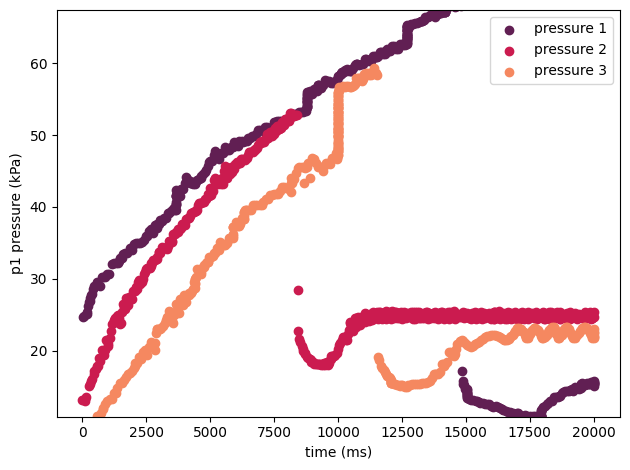

In [748]:
# load latest values
update_dict = in_dict # make sure plotted values are the ones updating
key = list(update_dict.keys())[-1]
# plot - TODO: pull the pressure differential from a function similar to valve_plot_dict_key, pull design parameters from Taguchi .csv, create entry for Ax
save_to = '/home/gmc/Documents/Valve_Design'
pic_name = in_key + "_test_fig"
print(pic_name)
valve_plot_dict_key(update_dict, key, save_loc = save_to)# , file_name = pic_name)

In [749]:
raise RuntimeError("MAKE SURE YOU WANT TO SAVE THIS DATA!!")

RuntimeError: MAKE SURE YOU WANT TO SAVE THIS DATA!!

In [750]:
os.chdir(file_dir)
pickle.dump(update_dict,open(file_name, 'wb'))

### Visualize the entire dataset

In [751]:
# load in the data
view_data = pickle.load(open(file_name, 'rb'))
print(view_data.keys())

dict_keys(['TESTING_-1', 'TESTING_0', 'TESTING_1', 'TESTING_2', 'TESTING_3', 'TESTING_4', 'TESTING_5', 'TESTING_6', 'TESTING_7', 'TESTING_8', 'TESTING_9', 'TESTING_10', 'TESTING_0.1', 'TESTING_0.2'])


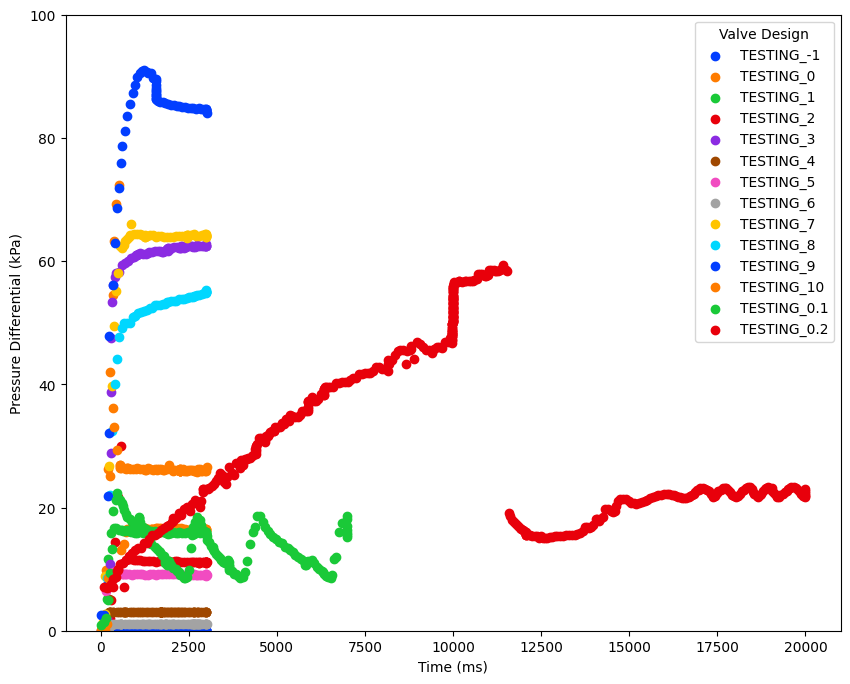

In [752]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
n = len(view_data.keys())



palette = sns.color_palette("bright", n)  # or try "Set2", "tab10", "deep", etc.
count = 0
for key in view_data.keys():
    this_test = view_data[key]
    printable = this_test[-1]
    ax.scatter(printable[0], printable[1], label = key, color = palette[count])
    count += 1

ax.set_ylim(0, 100)
ax.set_ylabel('Pressure Differential (kPa)')
ax.set_xlabel('Time (ms)')
plt.legend(title = 'Valve Design', loc = 'upper right', bbox_to_anchor=(1, 1))
plt.show()
